# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [5]:
!pip install xgboost 

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

## Data Overview

- Observations
- Sanity checks

In [3]:
EasyVisa = pd.read_csv("EasyVisa.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
data = EasyVisa.copy()

**View the first 5 rows of the dataset.**

In [9]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [10]:
data.shape

(25480, 12)

**Check data types and number of non-null values for each column.**

In [11]:
data.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations**

- We can see that there are total of 12 columns and 25480 rows in the dataset.
- All columns' data type is either object,integer or float, of which one column is float, two columns are integers while the rest are object type.
- The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.

**Summary of the dataset**

In [12]:
# Summary of continuous columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations**

- The mean and median value for no_ of_employees is approximately 5667.04 and 2109.00
- The mean and median value for prevailing_wage is approximately 74455.81 and 70308.21
- The minimum no_of_employee is -26.00 which is negatively skewed
- The maximum no_of_employee is 602069.00
- The mean and median yr_of_estab was 1979 and 1997

**Number of observations in each category**

In [13]:

data.describe(include=["object"])

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480,25480
unique,25480,6,4,2,2,5,4,2,2
top,EZYV8150,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,1,16861,10234,14802,22525,7195,22962,22773,17018


In [16]:
cat_cols=['case_id','continent','education_of_employee','has_job_experience','requires_job_training', 'region_of_employment','unit_of_wage','full_time_position','case_status']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

EZYV8150     1
EZYV1693     1
EZYV13794    1
EZYV14533    1
EZYV24643    1
            ..
EZYV25310    1
EZYV3335     1
EZYV16568    1
EZYV19974    1
EZYV2770     1
Name: case_id, Length: 25480, dtype: int64
------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
------------------------------
Year     22962
Hour      2157
Week       272
Month      

**Observations**

- There are 3 unique columns  with 'Yes or NO' status namely; has_job_experience, requires_job_training and full_time_position.
- Each employee has just one unique case_id
- Most of the employees are from Asia continent with a count of 16861
- The highest education of employees are Bachelors degree and the least is Dectorate degree with a count of 2192
- The target variable 'case_status' has most of the employees having their visas certified.
- Drop 'case_id' column as it is an ID variable and will not add value to the model.

In [5]:
#Dropping case_id column from the dataframe
data.drop(columns=['case_id'], inplace=True)

## Exploratory Data Analysis (EDA)

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

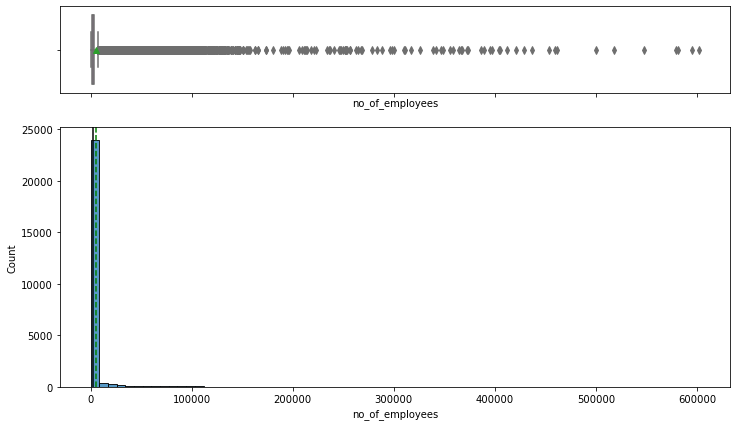

In [20]:
histogram_boxplot(data, "no_of_employees", bins=70)

**Observations**
- The distribution of no_of_employees is right-skwed
- There are outliers to the right


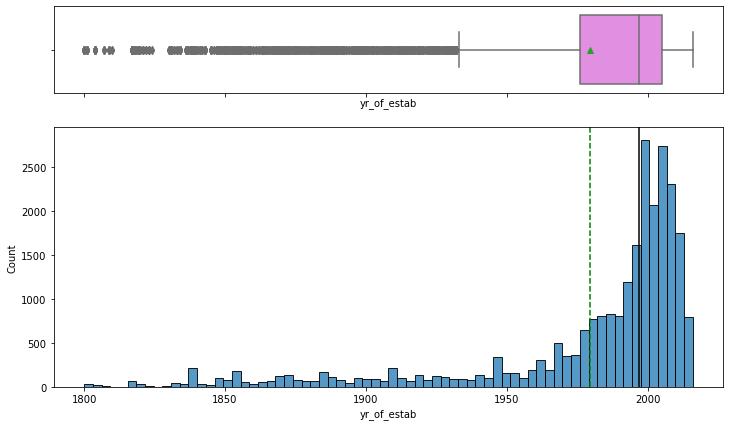

In [21]:
histogram_boxplot(data, "yr_of_estab", bins=70)

*Observations**

- The distribution of yr_of_estab is skewed to the left
- There are heavy outliers to the left
- The mean and median yr_of_estab is approximately 1979 and 1997
- As the year increases the number of applicants increases

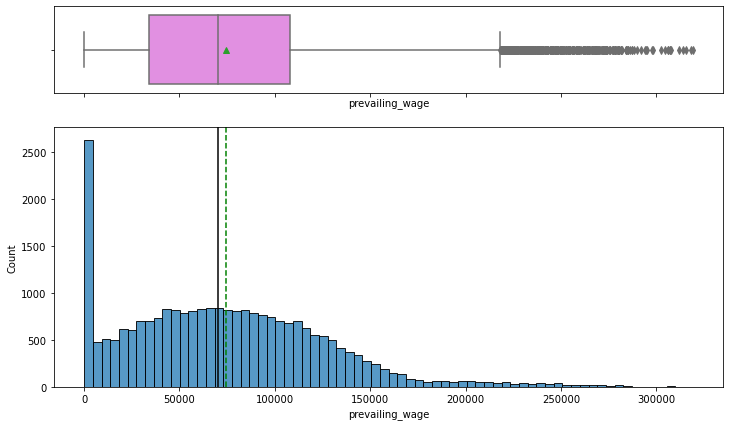

In [22]:
histogram_boxplot(data, "prevailing_wage", bins=70)

**Observations**

- Most of the values are concentrated to the left i.e. 0 to 150,000
- There are outliers to the right
- The distribution is approx distributed with mean and median equal to 72,000 and 78,000
- As the prevailing_wage increases, the lower the count 

**Exploring categorical variables**

In [6]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

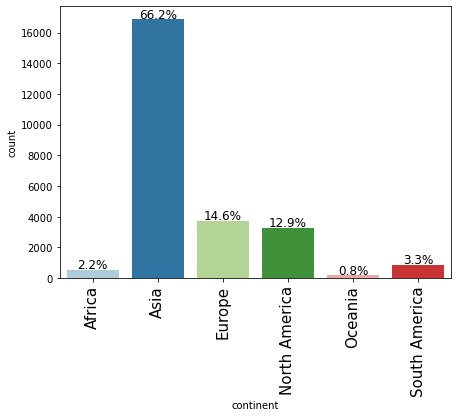

In [28]:
labeled_barplot(data, "continent", perc=True)

**Observations**

- Most employees are from Asia with 66.2%. 
- Few employees are from Africa with 2.2% while very few are from Oceania with 0.8%

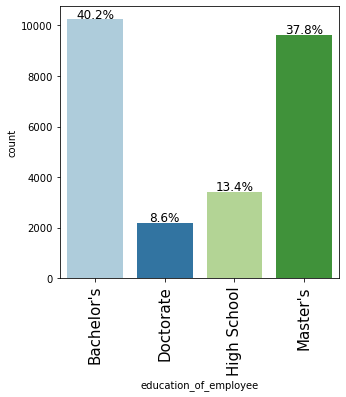

In [29]:
labeled_barplot(data, "education_of_employee", perc=True)

**Observation**

- The education of employees is max with 40.2% of Bachelor's, followed by Master's with 37.8%
-  Employees with Doctorate are only 8.6%

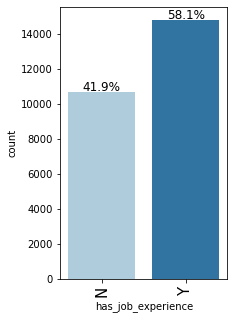

In [37]:
labeled_barplot(data, "has_job_experience", perc=True)

**Observations**

- 58.1% of employees have job experience
- 41.9% of employees have no job experience

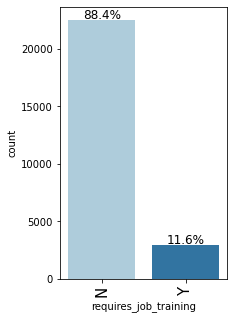

In [31]:
labeled_barplot(data, "requires_job_training", perc=True)

**Observation**

- 88.4% of employees require job training
- Only 11.6% of employees that does not require job training

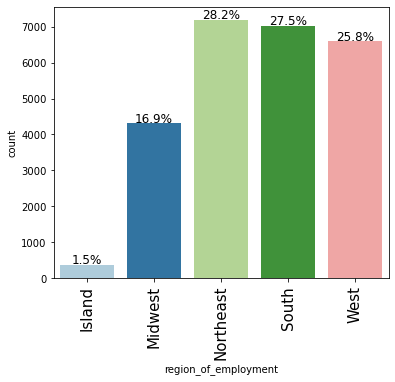

In [32]:
labeled_barplot(data, "region_of_employment", perc=True)

**Observations**

- Four regions namely; Midwest, Northeast, South and West are above average, with Northeast taking the lead with 28.2%
- Island region is the least with 1.5%

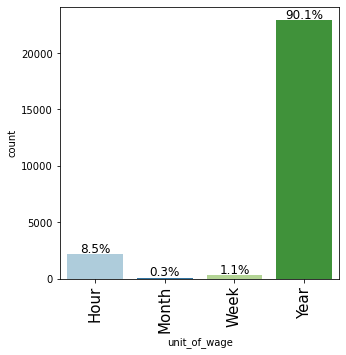

In [33]:
labeled_barplot(data, "unit_of_wage", perc=True)

**Observations**

- Employees unit of wage is highest in year with 90.1%
- The least unit of wage used is monthly with 0.3%

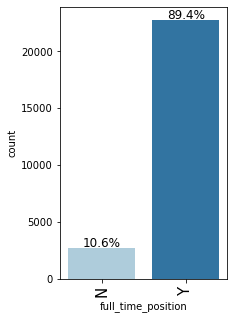

In [34]:
labeled_barplot(data, "full_time_position", perc=True)

**Observations**

- Most Employees are in full time positions with 89.4%
- Only a few are not in full time with 10.6%

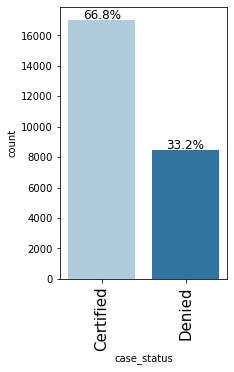

In [36]:
labeled_barplot(data, "case_status", perc=True)

**Obseravtions**

- 66.8% of employees have their visas certified
- 33.2% of employees have their visas denied

## Bivariate Analysis

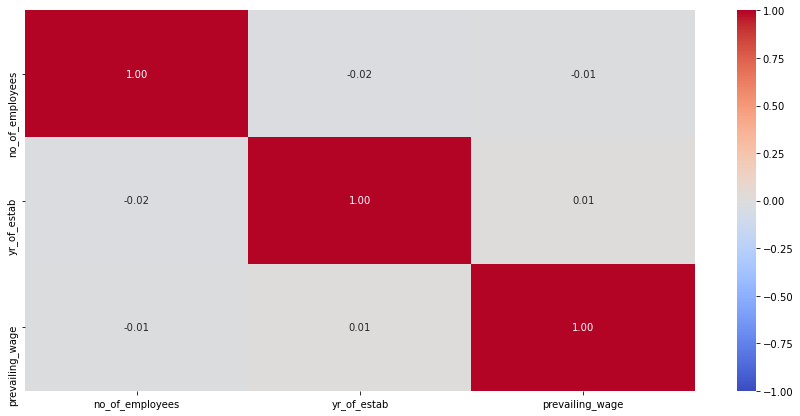

In [6]:
# Check for correlation among numerical variables
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="coolwarm",
)
plt.show()

**Observations**

- Number of employee is negatively corellated with year of establishment and prevailing wage
- Year of establishment is positively corellated with prevailing wage

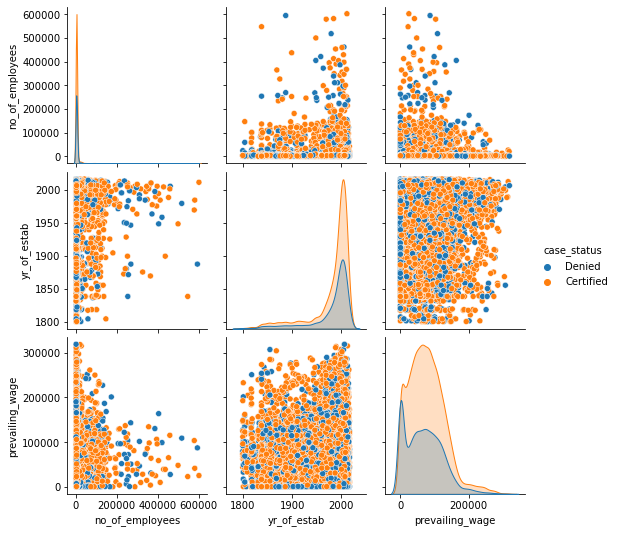

In [7]:
sns.pairplot(data=data, hue="case_status")
plt.show()

*Observations*

- Employees with certified status are more than the employees with denied status
- Employees with certified status started the company when it was established in year below 1800 to current year above 2000
- The prevailing rate for certified employees has been increasing right from start to present.

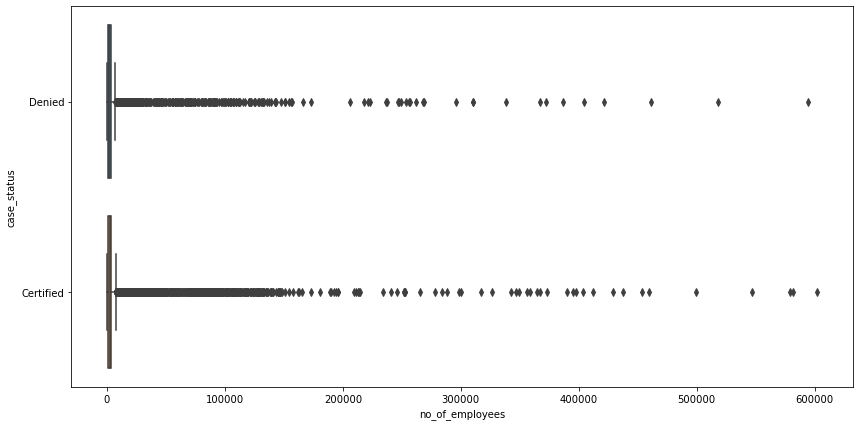

In [16]:
plt.figure(figsize=(14,7))           
sns.boxplot(data['no_of_employees'],data['case_status'])
plt.ylabel('case_status')
plt.xlabel('no_of_employees')
plt.show()

**Observations**

- The number of employees with denied visas is same with those with certified visas.
- There are heavy outliers to the right.

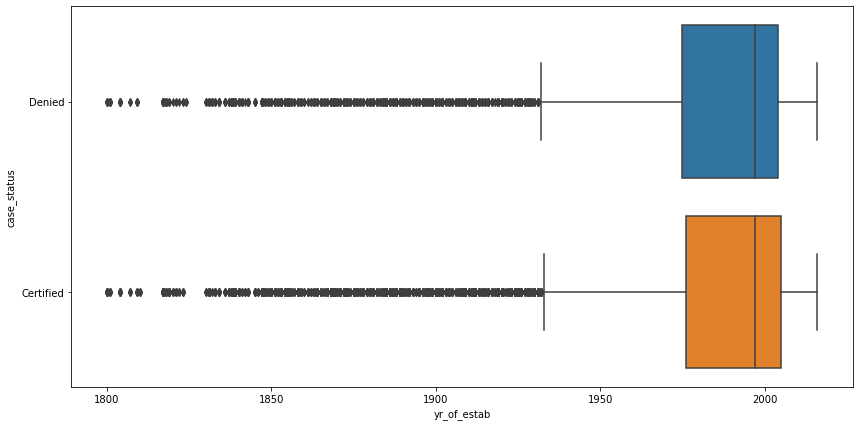

In [15]:
plt.figure(figsize=(14,7))           
sns.boxplot(data['yr_of_estab'],data['case_status'])
plt.ylabel('case_status')
plt.xlabel('yr_of_estab')
plt.show()

*Observation*
- The visa statues from the year of establishment to date is the same.
- There are heavy outliers to the left

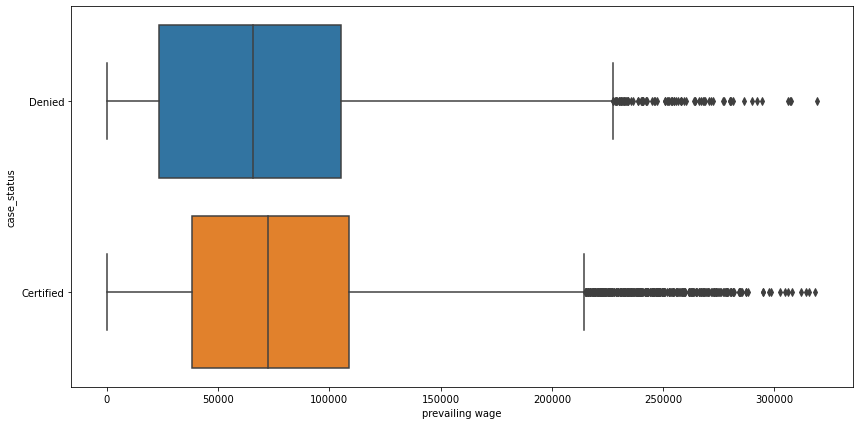

In [17]:
plt.figure(figsize=(14,7))           
sns.boxplot(data['prevailing_wage'],data['case_status'])
plt.ylabel('case_status')
plt.xlabel('prevailing wage')
plt.show()

**Observations**

- The prevailing wage for both denied and certified visas employees are the same. This means the Government has seen to it that foreign workers are not underpaid compared to other workers offering the same or similar service in the same area of employment.


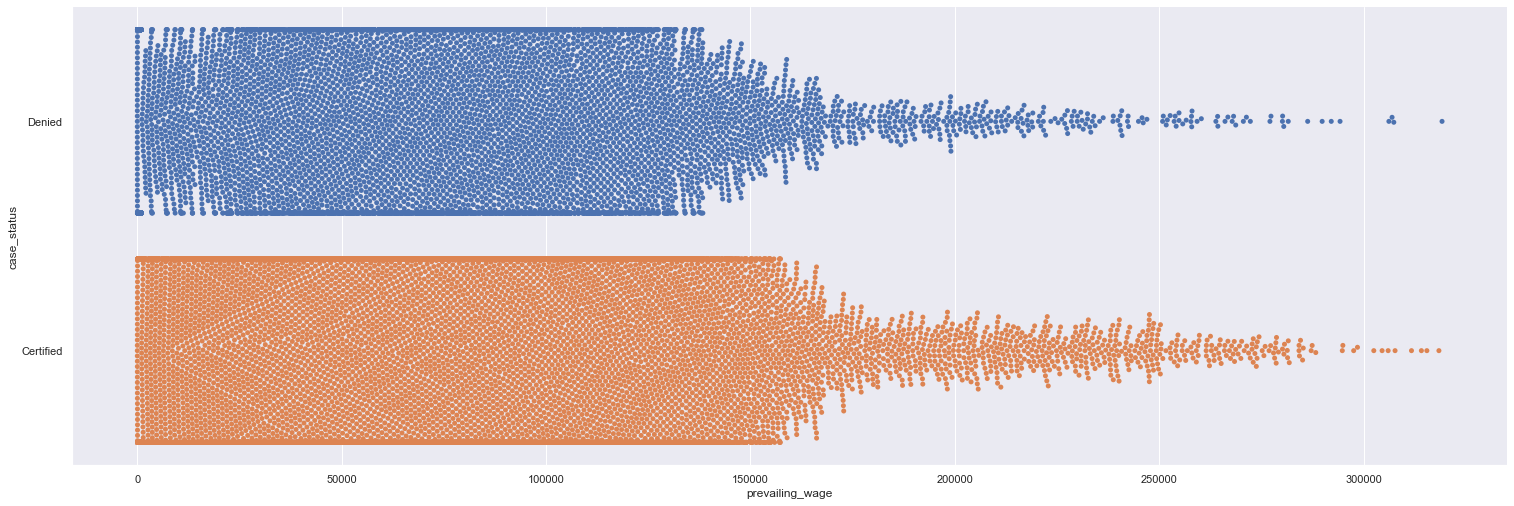

In [13]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="prevailing_wage", y="case_status", kind="swarm", data=data, height=7, aspect=3);

**Observations**

- The prevailing wage for both denied and certified visas employees are the same. This means the Government has seen to it that foreign workers are not underpaid compared to other workers offering the same or similar service in the same area of employment.


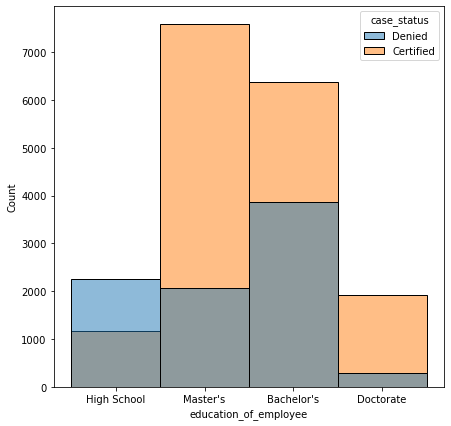

In [8]:
plt.figure(figsize=(7, 7))
sns.histplot(data = data, x = 'education_of_employee', hue = 'case_status')
plt.show()

*Observations*

- Employees with Master's got the highest number of visas certified followed by Bachelor's
- Employes with High School got their visas denied.

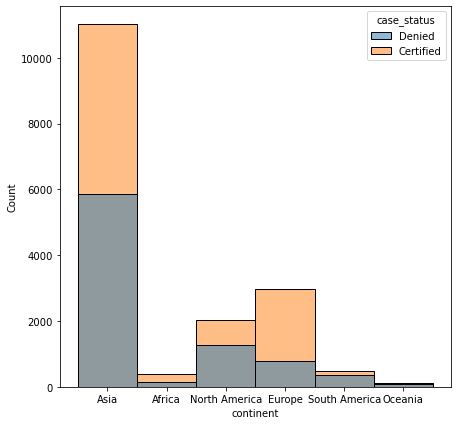

In [10]:
plt.figure(figsize=(7, 7))
sns.histplot(data = data, x = 'continent', hue = 'case_status')
plt.show()

*Observations*

- Employees from Asia continent got the highest number of visas certified
- Employees from South America got the least visas certified
- While employees from Oceania continentgot no visas approved.

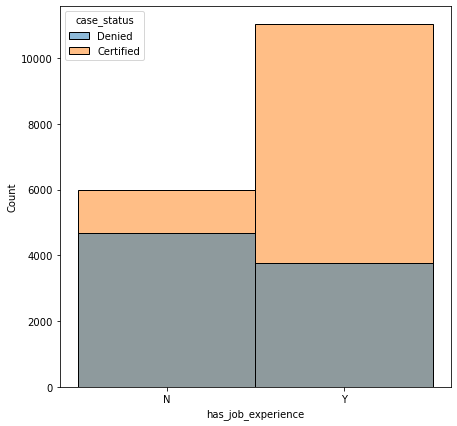

In [11]:
plt.figure(figsize=(7, 7))
sns.histplot(data = data, x = 'has_job_experience', hue = 'case_status')
plt.show()

**Observations**

- Employees with job experience got the highest number of visas certified
- Employees without job experience got only a few of their visas certified.

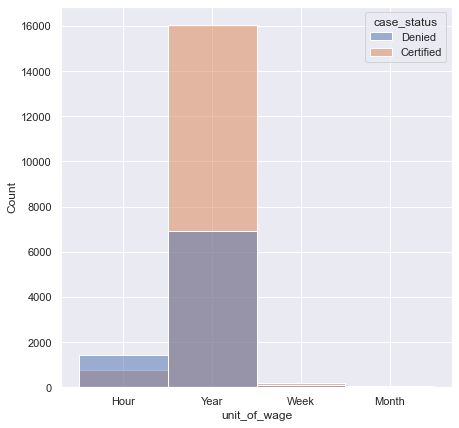

In [15]:
plt.figure(figsize=(7, 7))
sns.histplot(data = data, x = 'unit_of_wage', hue = 'case_status')
plt.show()

**Observations**

 - The yearly unit of wage is used for employees with certified visas
 - While the hourly unit of wage is used for employees with denied visas 

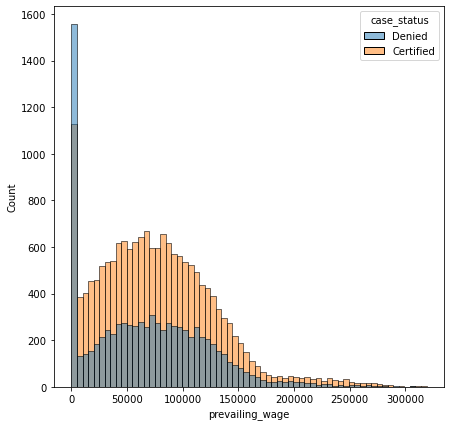

In [7]:
plt.figure(figsize=(7, 7))
sns.histplot(data = data, x = 'prevailing_wage', hue = 'case_status')
plt.show()

*Observation**
- The count for certified visa is above 600
- Prevailing wage increases as the count reduces

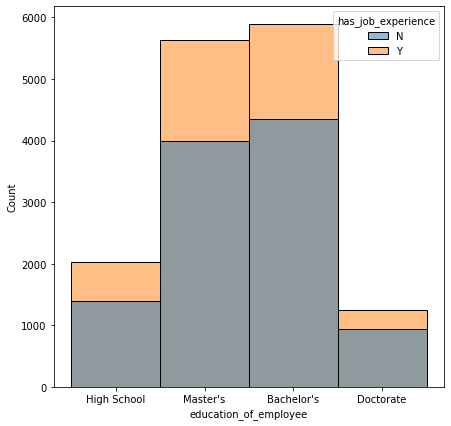

In [8]:
plt.figure(figsize=(7, 7))
sns.histplot(data = data, x = 'education_of_employee', hue = 'has_job_experience')
plt.show()

**Observation**
- Only a few educated employees have job experience

**Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

**Ans**: Yes, education plays a vital role in visa certification, it can be seen from our EDA that employees with Master's got the highest number of visas certified followed by Bachelor's. While employes with High School got their visas denied.


2. How does the visa status vary across different continents? 
 
 
 **Ans**:
 - Employees from Asia continent got the highest number of visas certified
- Employees from South America got the least visas certified
- Europe, North America and African continents got only a few visas certified
- While employees from Oceania continent got no visas certified


3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

**Ans**: Yes, work experience influnced visa staus, as employees with work experience got the highest number of visas certified.While employees without job experience got only a few of their visas certified.
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

**Ans**: The yearly unit of wage is used for employees with certified visas, While the hourly unit of wage is used for employees with denied visas. 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**Ans**: Visa status did not change as both denied and certified employees have the same prevailing wage.Hence no one will be underpaid. 


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [11]:
data.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no missing values.

### Detecting & treating of outliers

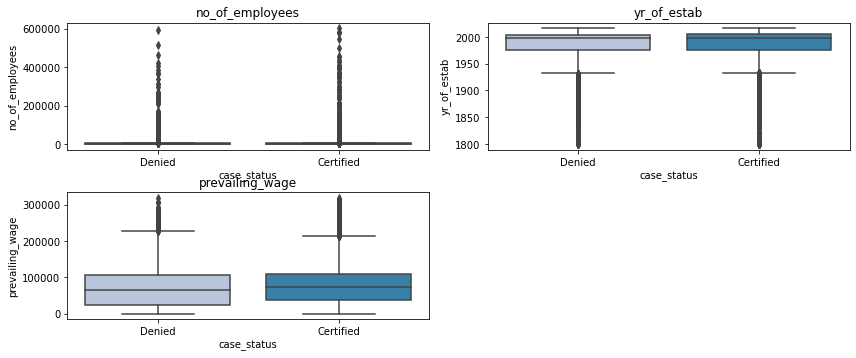

In [5]:
cols = data[
    [
        "no_of_employees",
        "yr_of_estab",
        "prevailing_wage",
       
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["case_status"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

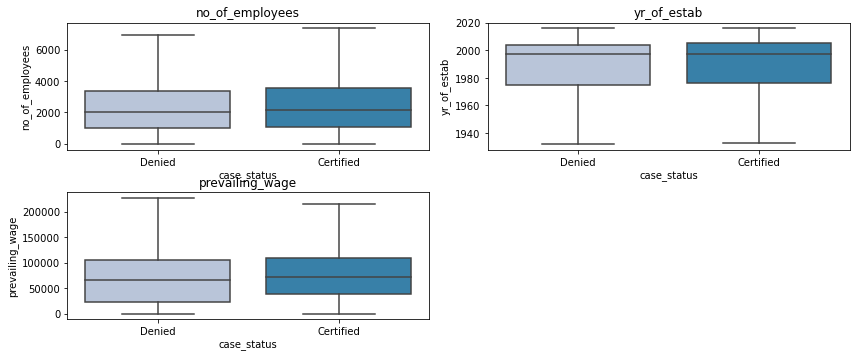

In [6]:
cols = data[
    ["no_of_employees",
        "yr_of_estab",
        "prevailing_wage",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(
        data["case_status"], data[variable], palette="PuBu", showfliers=False
    )
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations**

- Outliers treated
- Employees with certified visas are a little higher than those denied visas
- The year of establishment is same for both denied and certified employees
- The prevailing wage for both denied and certified employees are 200000 count

**Feature Engineering**

In [14]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [12]:
print(data.continent.value_counts())
print(data.education_of_employee.value_counts())
print(data.region_of_employment.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64


In [15]:
replaceStruct = {"case_status": {"Denied": 0, "Certified": 1}}
oneHotCols = ["continent", "education_of_employee", "has_job_experience","requires_job_training","region_of_employment","unit_of_wage","full_time_position"]

In [16]:
data = data.replace(replaceStruct)
data = pd.get_dummies(data, columns=oneHotCols)
data.head(10)

,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,...,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y
0,14513,2007,592.2029,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,2412,2002,83425.6500,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,44444,2008,122996.8600,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,98,1897,83434.0300,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,1082,2005,149907.3900,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
5,2339,2012,78252.1400,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
6,4985,1994,53635.3900,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
7,3035,1924,418.2298,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
8,4810,2012,74362.1900,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
9,2251,1995,67514.7600,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   yr_of_estab                        25480 non-null  int64  
 2   prevailing_wage                    25480 non-null  float64
 3   case_status                        25480 non-null  int64  
 4   continent_Africa                   25480 non-null  uint8  
 5   continent_Asia                     25480 non-null  uint8  
 6   continent_Europe                   25480 non-null  uint8  
 7   continent_North America            25480 non-null  uint8  
 8   continent_Oceania                  25480 non-null  uint8  
 9   continent_South America            25480 non-null  uint8  
 10  education_of_employee_Bachelor's   25480 non-null  uint8  
 11  education_of_employee_Doctorate    25480 non-null  uin

## <a id='link1'>Summary of EDA</a>

**Data Description:**

* Dependent variable is "case_status" which is representing the count of denied and certified visa and it is of object data type.
* no_of_employees,yr_of_estab and prevailing_wage are of integers and float data type while rest of the features are objects.
* There are no missing values in the dataset.

**Data Cleaning:**


* case ID variable was dropped from the data, as it does not add bvalue to the model.

**Observations from EDA:**


* `continent`: Asian had the highest number of employees.
* `education_of_employee`Those with Bachelor's have a good number of employees.
* `has_job_experience`: Those with experirnce have 58.1% of employees.
* `requires_job_training`: Most employees require job training
* `no_of_employees`: It has a distribution with mean and median equal to 0 approximately.
* `yr_of_estab`: The mean and median yr_of_estab is in yr 1979 and 1997
* `region_of_employment`: Northeast and South are evenly distributed with 28.2% and 27.5%
* `prevailing_wage`: The distribution is approx distributed with mean and median equal to 72,000 and 78,000.
* `unit_of_wage`: The yearly unit of wage has approx 90.1% of observations.
* `full_time_position`: The number of observations for full time position is 89.4%.
* `case_status`: The number of observations for certifed visa (66.4%) higher than denied visas.




## Split Data

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function.

In [17]:
# Separating features and the target column
X = data.drop('case_status', axis=1)
y = data['case_status']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

**Before building the model, we need functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [19]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1_score of the model
    train_f1_score = metrics.f1_score(y_train,pred_train)
    test_f1_score = metrics.f1_score(y_test,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1_score,test_f1_score))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1_score on training set : ",metrics.precision_score(y_train,pred_train))
        print("F1_score on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Building Bagging models

- I will build 3 models - Decision Tree, Bagging Classifier and Random Forest Classifier.
- First, build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- Then, calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting visa approvals as visa denials.

### Decision Tree

In [31]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

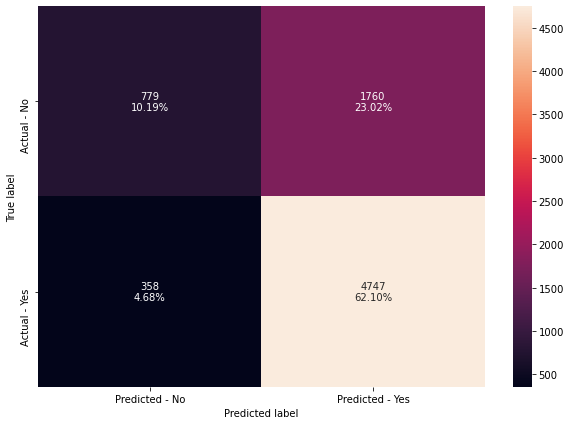

In [32]:
make_confusion_matrix(dTree1, y_test)

In [35]:
#Using above defined function to get accuracy, recall, precision and f1_score on train and test set
dTree1_score=get_metrics_score(dTree1)

Accuracy on training set :  0.7302646333258578
Accuracy on test set :  0.7229199372056515
Recall on training set :  0.9294887937547217
Recall on test set :  0.9298726738491675
Precision on training set :  0.7360409465567668
Precision on test set :  0.7295220531735055
F1_score on training set :  0.7360409465567668
F1_score on test set :  0.7295220531735055


**Observations*
- The Accuracy of the model is good, there are no overfitting
- Recall is high, which means there are low chances for the model to predict visa approvals as visa denial.

### Bagging Classifier

In [36]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [37]:
#Using above defined function to get accuracy, recall, precision and f1_score on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9840210809598565
Accuracy on test set :  0.7036891679748822
Recall on training set :  0.9846386300679929
Recall on test set :  0.7757100881488737
Precision on training set :  0.9913793103448276
Precision on test set :  0.7795275590551181
F1_score on training set :  0.9913793103448276
F1_score on test set :  0.7795275590551181


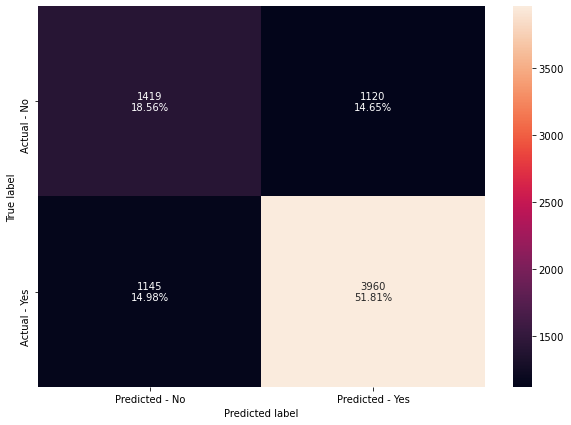

In [24]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [38]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [39]:
#Using above defined function to get accuracy, recall, precision and f1_score on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  0.999943933617403
Accuracy on test set :  0.7221350078492935
Recall on training set :  0.9999160580878033
Recall on test set :  0.8307541625857003
Precision on training set :  1.0
Precision on test set :  0.7709507362297764
F1_score on training set :  1.0
F1_score on test set :  0.7709507362297764


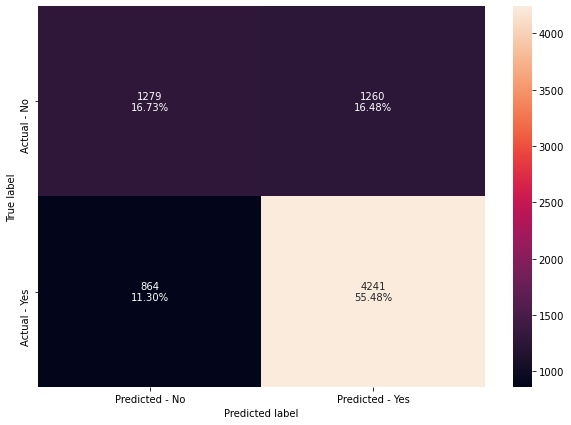

In [40]:
make_confusion_matrix(rf_estimator,y_test)

**Observations:**

- Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.
- Both models are giving similar performance in terms of accuracy but random forest classifier is giving better recall.

##  Will tuning the hyperparameters improve the model performance?

### Using GridSearch for Hyperparameter tuning of our Decision tree model

* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [40]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

In [41]:
#Using defined function to get accuracy, recall, precision and f1_score on train and test set
estimator_score=get_metrics_score(estimator)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036
F1_score on training set :  0.6679188158779995
F1_score on test set :  0.6678440607012036


**Observation**
- The Accuracy of the model has reduced, model is generalizing well
- Recall has increased

## Hyperparameter Tuning

### Bagging Classifier

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [42]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

In [43]:
#Using above defined function to get accuracy, recall, precision and f1_score on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036
F1_score on training set :  0.6679188158779995
F1_score on test set :  0.6678440607012036


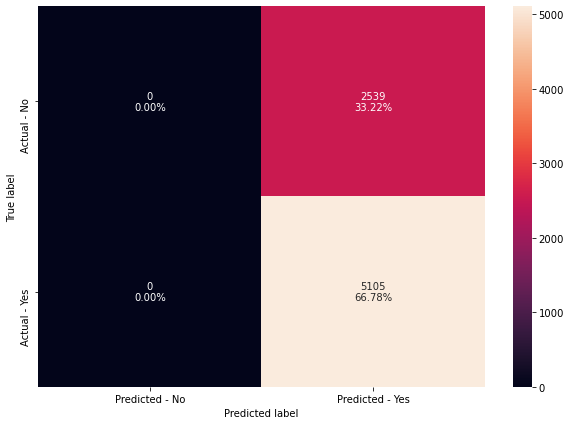

In [31]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

**Observation**

- The model accuracy has decreased a bit but the overfitting is no more there and the model is generalizing well.
- The train and test recall both have increased significantly.
- We can see from the confusion matrix that the Baging classifier model with bagging estimator tuned is now better at facilitating visa approvals as compared to other models.

### Let's try using logistic regression as the base estimator for bagging classifier:
- I will change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- And will pass the logistic regression as the base estimator for bagging classifier.

In [44]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [45]:
#Using above defined function to get accuracy, recall, precision and f1_score on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036
F1_score on training set :  0.6679188158779995
F1_score on test set :  0.6678440607012036


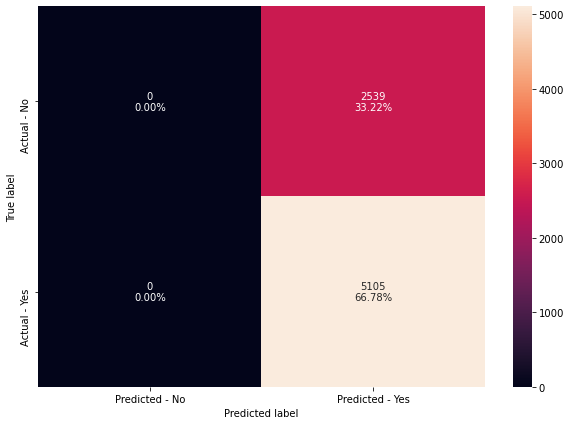

In [36]:
make_confusion_matrix(bagging_lr,y_test)

**Observations**

- Both bagging estimator tuned and logistic regression gave same result.
- Accuracy is good , no overfitting
- Recall is high

### Random Forest Classifier

In [46]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=9,
                       n_estimators=200, random_state=1)

In [47]:


#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)



Accuracy on training set :  0.7621103386409509
Accuracy on test set :  0.7469911041339613
Recall on training set :  0.8808864265927978
Recall on test set :  0.8726738491674828
Precision on training set :  0.7879561495720078
Precision on test set :  0.7762676424464192
F1_score on training set :  0.7879561495720078
F1_score on test set :  0.7762676424464192


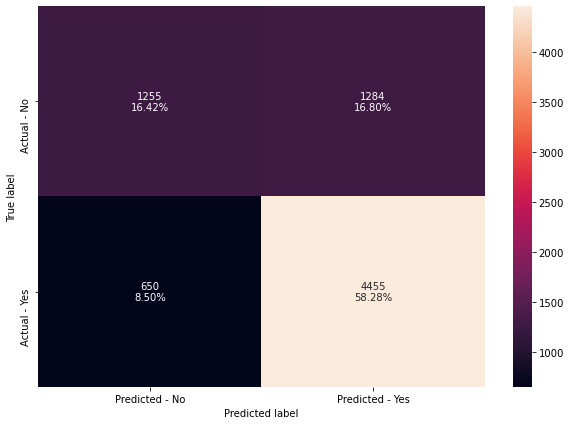

In [48]:
make_confusion_matrix(rf_estimator_tuned,y_test)

### Observations
- We can see that random forest's performance has increased as compared to the random forest model with default parameters.
- Model is not overfitting the data just as the tuned bagging classifier did not overfit.
- The test recall is slightly lower than the tuned bagging classifier. This means that the model can be further tuned to get the best approach to facilitate visa approvals.

### Let's try using class_weights for random forest:
- The model performance is not very good. This may be due to the fact that the classes are imbalanced with 70% non-defaulters and 30% defaulters. 

- We should make the model aware that the class of interest here is 'Visa Approvals'.

- We can do so by passing the parameter `class_weights` available for random forest. This parameter is not available for the bagging classifier.

- class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- We can choose class_weights={0:0.3,1:0.7} because that is the original imbalance in our data.

In [49]:
## Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.



rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.2,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=150,
                       random_state=1)

In [50]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.7196120206324288
Accuracy on test set :  0.7046049188906331
Recall on training set :  0.9803575925459582
Recall on test set :  0.9729676787463272
Precision on training set :  0.7101422838380154
Precision on test set :  0.7008607309157613
F1_score on training set :  0.7101422838380154
F1_score on test set :  0.7008607309157613


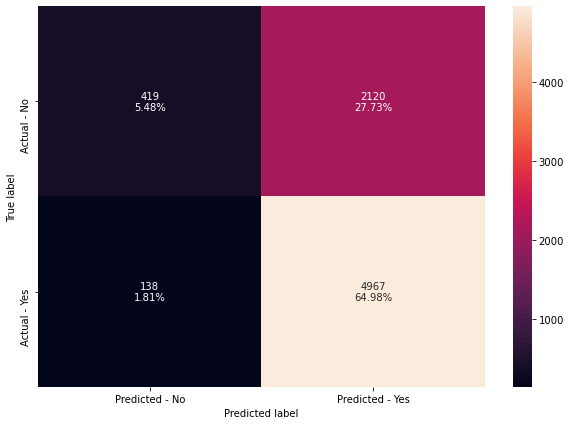

In [26]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Observations
- The model accuracy has decreased a bit and there is no overfitting.The model is also generalizing well.
- The train and test recall both have increased significantly.
- We can see from the confusion matrix that the random forest model with class weights is now better in facilitating visa approvals as compared to other models.

### Checking the feature importance

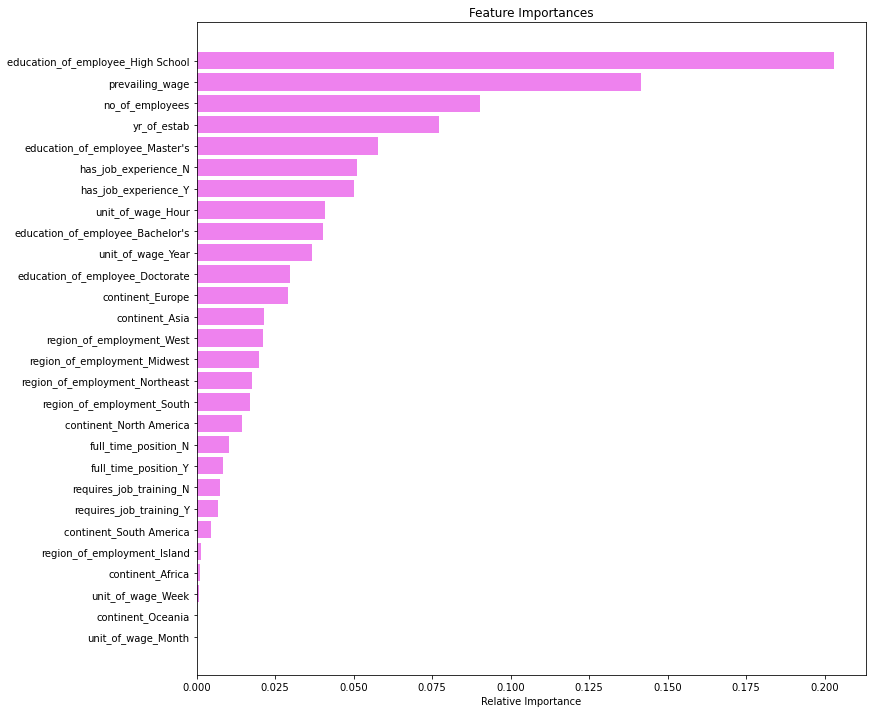

In [51]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 ### Checking the feature importance
    
 - Education _of_employee_High School, prevailing_wage and no_of employees are the top 3 features.

### Comparing all Bagging models performance

In [54]:
# defining list of models
models = [dTree1,estimator,bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train = []
f1_score_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_score_train.append(np.round(j[6],2))
    f1_score_test.append(np.round(j[7],2))

In [55]:
comparison_frame = pd.DataFrame({'Model':['DecisionTreeClassifier','Tuned DecisionTreeClassifier with estimator','Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_f1_score':f1_score_train,'Test_f1_score':f1_score_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_f1_score,Test_f1_score
0,DecisionTreeClassifier,0.73,0.72,0.93,0.93,0.74,0.73,0.82,0.82
1,Tuned DecisionTreeClassifier with estimator,0.67,0.67,1.00,1.00,0.67,0.67,0.80,0.80
2,Bagging classifier with default parameters,0.98,0.70,0.98,0.78,0.99,0.78,0.99,0.78
3,Tuned Bagging Classifier,0.67,0.67,1.00,1.00,0.67,0.67,0.80,0.80
4,Bagging classifier with base_estimator=LR,0.67,0.67,1.00,1.00,0.67,0.67,0.80,0.80
5,Random Forest with deafult parameters,1.00,0.72,1.00,0.83,1.00,0.77,1.00,0.80
6,Tuned Random Forest Classifier,0.76,0.75,0.88,0.87,0.79,0.78,0.83,0.82
7,Random Forest with class_weights,0.72,0.70,0.98,0.97,0.71,0.70,0.82,0.81


## Building Boosting models

## Building the model
- I will be building 3 ensemble models: - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- Firstly, build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- Then,calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting visa approval as visa denial.

### AdaBoost Classifier

In [56]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [57]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.7373289975330791
Accuracy on test set :  0.7346938775510204
Recall on training set :  0.8857550575002099
Recall on test set :  0.8836434867776689
Precision on training set :  0.7604496973191122
Precision on test set :  0.7587888982338099
F1_score on training set :  0.7604496973191122
F1_score on test set :  0.7587888982338099


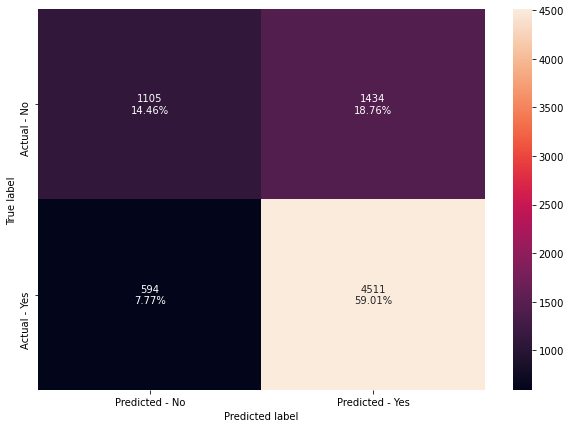

In [33]:
make_confusion_matrix(abc,y_test)

### Gradient Boosting Classifier

In [58]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [59]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7570643642072213
Accuracy on test set :  0.7451596023024595
Recall on training set :  0.8814740199781751
Recall on test set :  0.8752203721841332
Precision on training set :  0.782372224705707
Precision on test set :  0.7731441425852223
F1_score on training set :  0.782372224705707
F1_score on test set :  0.7731441425852223


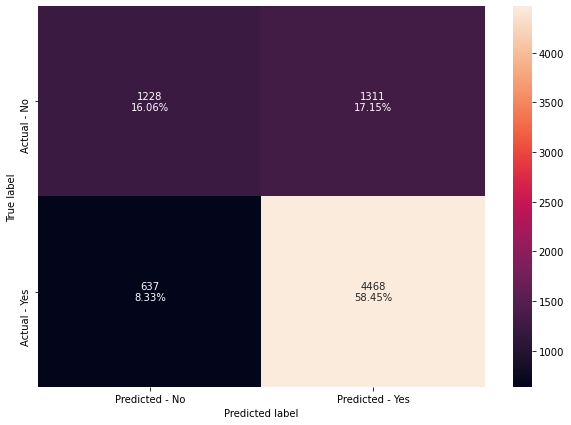

In [36]:
make_confusion_matrix(gbc,y_test)

### XGBoost Classifier

In [60]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.8395380130074007
Accuracy on test set :  0.7294610151753009
Recall on training set :  0.933266179803576
Recall on test set :  0.8571988246816846
Precision on training set :  0.843230944254835
Precision on test set :  0.7657042869641295
F1_score on training set :  0.843230944254835
F1_score on test set :  0.7657042869641295


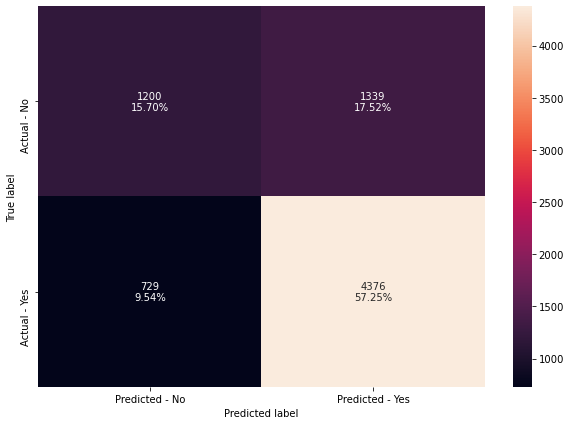

In [39]:
make_confusion_matrix(xgb,y_test)

**With default parameters:**
- AdaBoost classifier has better test accuracy among these 3 models.
- XGB classifier has least test accuracy and test recall.

##  Will tuning the hyperparameters improve the model performance?

## Hyperparameter Tuning


### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [62]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [63]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.6919152276295133
Accuracy on test set :  0.6906070120355835
Recall on training set :  0.9714597498531017
Recall on test set :  0.9719882468168463
Precision on training set :  0.6918340506934482
Precision on test set :  0.6907015590200446
F1_score on training set :  0.6918340506934482
F1_score on test set :  0.6907015590200446


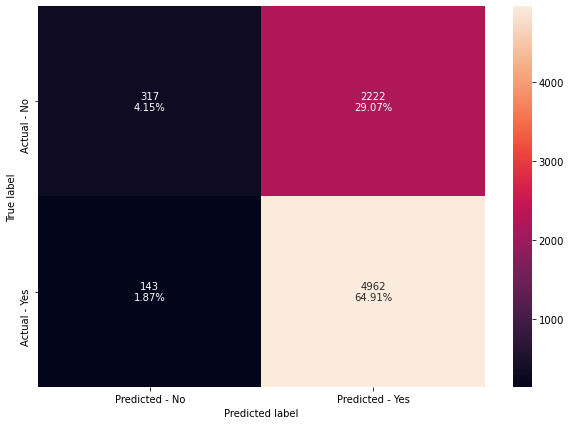

In [42]:
make_confusion_matrix(abc_tuned,y_test)

### Insights
- The model is  not overfitting but rather generalizing well.
- The model has high test recall. This implies that the model is  good at predicting visa approvals.

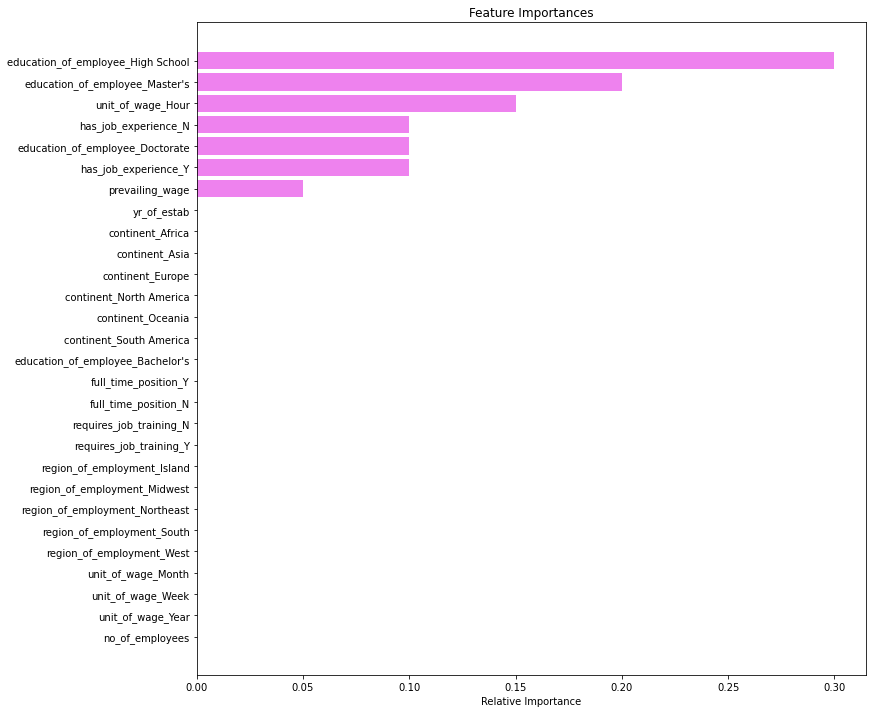

In [43]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- education_of_employee_High School is the most important feature as per the tuned AdaBoost model.

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Using AdaBoost classifier as the estimator for initial predictions**

In [64]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [65]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.7558309037900874
Accuracy on test set :  0.7458137100994244
Recall on training set :  0.8802148912952237
Recall on test set :  0.8760039177277179
Precision on training set :  0.7817205904279111
Precision on test set :  0.7734347976478727
F1_score on training set :  0.7817205904279111
F1_score on test set :  0.7734347976478727


**As compared to the model with default parameters:**

- Test accuracy have increased slightly.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [66]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.8)

In [67]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.7381699932720341
Accuracy on test set :  0.727760334903192
Recall on training set :  0.9115252245446152
Recall on test set :  0.9063663075416258
Precision on training set :  0.7501899827288429
Precision on test set :  0.7426966292134831
F1_score on training set :  0.7501899827288429
F1_score on test set :  0.7426966292134831


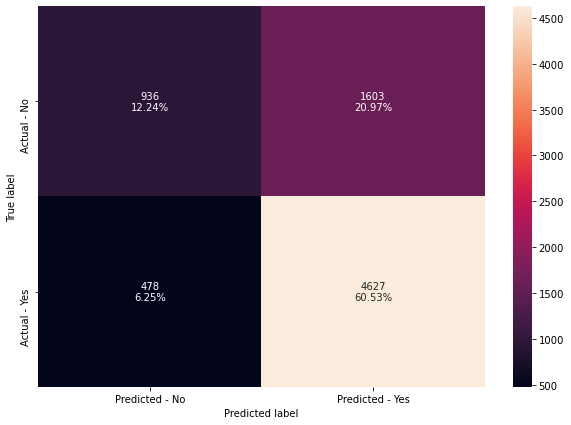

In [51]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
- The model performace has not increased.
- The model accuracy has reduced a bit, but recall has increased.


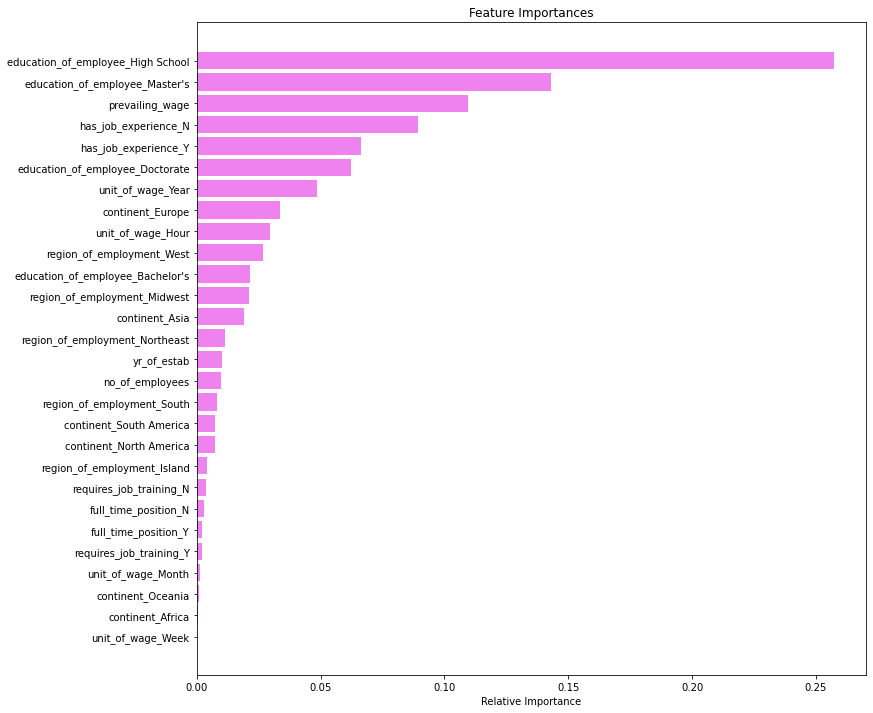

In [52]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- education_of_employee_High School, education_of_employee_Master's and prevailing_wage are the top 3 features of the tuned gradient boosting 

### Comparing all Boosting models performance

In [68]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train = []
f1_score_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_score_train.append(np.round(j[6],2))
    f1_score_test.append(np.round(j[7],2))

In [69]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_f1_score':f1_score_train,'Test_f1_score':f1_score_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_f1_score,Test_f1_score
0,AdaBoost with default paramters,0.74,0.73,0.89,0.88,0.76,0.76,0.82,0.82
1,AdaBoost Tuned,0.69,0.69,0.97,0.97,0.69,0.69,0.81,0.81
2,Gradient Boosting with default parameters,0.76,0.75,0.88,0.88,0.78,0.77,0.83,0.82
3,Gradient Boosting with init=AdaBoost,0.76,0.75,0.88,0.88,0.78,0.77,0.83,0.82
4,Gradient Boosting Tuned,0.74,0.73,0.91,0.91,0.75,0.74,0.82,0.82
5,XGBoost with default parameters,0.84,0.73,0.93,0.86,0.84,0.77,0.89,0.81


## Stacking Model

**Building a stack model with the tuned models - decision tree, random forest, and gradient boosting.**

In [70]:
estimators=[('Decision Tree', estimator),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned)]


In [71]:
stacking_estimator=StackingClassifier(estimators=estimators,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=1,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.1,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=0.2,
                                                       max_samples=0.3,
                                                       min_samples_leaf=9,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max

In [72]:
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.7615496748149809
Accuracy on test set :  0.7473835688121402
Recall on training set :  0.8743389574414505
Recall on test set :  0.8683643486777669
Precision on training set :  0.7907682963862739
Precision on test set :  0.7788123682361209
F1_score on training set :  0.7907682963862739
F1_score on test set :  0.7788123682361209


## Model Performance Comparison and Conclusions 

In [73]:
# defining list of models
models = [dTree1,estimator,bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted,abc,abc_tuned,gbc,gbc_init,gbc_tuned,xgb,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train = []
f1_score_test = []
# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_score_train.append(np.round(j[6],2))
    f1_score_test.append(np.round(j[7],2))

In [74]:
comparison_frame = pd.DataFrame({'Model':['DecisionTreeClassifier','Tuned DecisionTreeClassifier with estimator','Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','stacking_estimator'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_f1_score':f1_score_train,'Test_f1_score':f1_score_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_f1_score,Test_f1_score
0,DecisionTreeClassifier,0.73,0.72,0.93,0.93,0.74,0.73,0.82,0.82
1,Tuned DecisionTreeClassifier with estimator,0.67,0.67,1.00,1.00,0.67,0.67,0.80,0.80
2,Bagging classifier with default parameters,0.98,0.70,0.98,0.78,0.99,0.78,0.99,0.78
3,Tuned Bagging Classifier,0.67,0.67,1.00,1.00,0.67,0.67,0.80,0.80
4,Bagging classifier with base_estimator=LR,0.67,0.67,1.00,1.00,0.67,0.67,0.80,0.80
5,Random Forest with deafult parameters,1.00,0.72,1.00,0.83,1.00,0.77,1.00,0.80
6,Tuned Random Forest Classifier,0.76,0.75,0.88,0.87,0.79,0.78,0.83,0.82
7,Random Forest with class_weights,0.72,0.70,0.98,0.97,0.71,0.70,0.82,0.81
8,AdaBoost with default paramters,0.74,0.73,0.89,0.88,0.76,0.76,0.82,0.82
9,AdaBoost Tuned,0.69,0.69,0.97,0.97,0.69,0.69,0.81,0.81


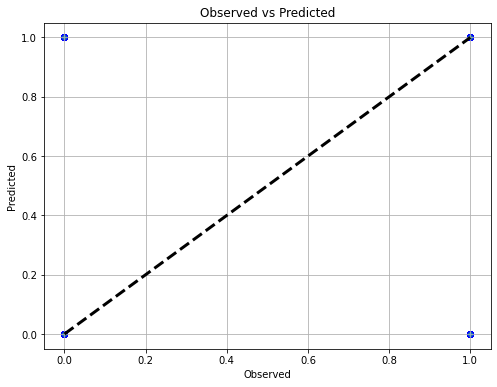

In [75]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gbc.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

**Observation**

- The line meets the two points where the predicted is equal to the observed.

## Model Performance Comparison and Conclusions

### Checking the feature importance

* Overall we can see that the Gradient Boosting with init = AdaBoost model performs better on the dataset.
* Looking at important variables based on the weighted Random Forest Classifier, AdaBoost tuned, and Gradient Boost tuned models indicates that the most significant predictors of Visa Approvals as shown below;

- education _of_employee_High School, 
- education_of_employee_Master’s and
- prevailing_wage 

We will use Recall Score as the performance metric for our model because;
- If we predict that a candidate should have his visa approved and the visa gets denied then the company will miss out that qualified candidate, and will lose resources and bear additional costs of distribution channels.
- If we predict that a candidate will have his visa denied and the visa doesn't get denied then the company might not be able to provide satisfactory services to the customer, and this might damage the brand equity.

From our comparison table, the Train and Test Recall score for Gradient Boosting with init=AdaBoost	 is 0.88, this makes it the best performing model, 
because Recall gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting visa approval as visa denial.



## Actionable Insights and Recommendations

 We can use this predictive models parameters to predict the number of visas to be approved. The ability to predict the number of visa approvals and denials can allow the management (businesses/governments) that oversee these systems to facilitate the visa process.
- Visas should be approved for employees with High School education as this group of employees are younger and will be more productive.
- Also employees with Master's education should have their visas approved. We still have some younger employees in these group.
- Employees with certified visas would have a higher prevailing wage
- Employees with job expereince have a high chance of visa certified
- As the year increases the number of applicants increases

**Recommendation**:

Visa approvals should be grouped into two classes one should be for those with education and the second is for those with job experience.
From the features of importance, only those educated where considered, but they do not have experience on the job, while those who have the job experience are being denied visas.
